# Overview

We're now switching focus away from Network Science (for a little bit), beginning to think about _Natural Language Processing_ instead. In other words, today will be all about teaching your computer to "understand" text. This ties in nicely with our work on the rappers network, since it is built on the rapper Wikipedia pages which contain pieces of text. We've looked at the network so far - now, let's see if we can include the text. Today is about 

* Installing the _natural language toolkit_ (NLTK) package and learning the basics of how it works (Chapter 1)
* Figuring out how to make NLTK to work with other types of text (Chapter 2).

> _Reading_
> The reading for today is Natural Language Processing with Python (NLPP) Chapter 1 and 2. [It's free online](http://www.nltk.org/book/). 

# Part 1: A little lecture

> [**_Video Lecture_**](https://www.dropbox.com/scl/fi/vj2h6pekdl6y8yid070y5/NLP_Intro.mp4?rlkey=kajuxgfl413ql3q1qwdrqf9ok&dl=0). Today is all about ***working*** with NLTK, so not much lecturing - just a few words on NLP.

# Part 2: Installing and the basics

## 2.1 NLTK Install tips 

Check to see if `nltk` is installed on your system by typing `import nltk` in a `notebook`. If it's not already installed, install it as part of _Anaconda_ by typing 

     conda install nltk 

at the command prompt. If you don't have them, you can download the various corpora using a command-line version of the downloader that runs in Python notebooks (as mentioned in Ch. 1 Sec. 1.2 of the book): 

In the Jupyter notebook, run the code 

 `import nltk`
 
 `nltk.download()`

Now you can hit `d` to download, then type "book" to fetch the collection needed today's `nltk` session. Now that everything is up and running, let's get to the actual exercises.

**Note**: If, instead of opening the pop-up, your Kernel dies, you can direclty download the collection by typing `nltk.download("book")` instead.

In [1]:
import nltk
import pandas as pd
from tqdm import tqdm
import requests
from nltk.corpus import PlaintextCorpusReader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
book = nltk.download('book')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\xmullaym\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\xmullaym\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\xmullaym\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\xmullaym\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\xmullaym\AppData\Roaming\nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\

## 2.2 Introduction to NLTK

1. Now that you have `nltk` installed, work through Chapter 1, Sections 1 to 4. The book is set up as a kind of tutorial with lots of examples for you to work through. I recommend you read the text with an open Jupyter Notebook and type out the examples that you see. ***It becomes much more fun if you add a few variations and see what happens***. We tweaked some of these examples in the following exercises and they might very well be due as assignments, so those ones should definitely be in a `notebook`.

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


2. Now that you have gone through Chapter 1, let's try some of the `nltk` functionalities on our own Text!

> Setup. We want to start from a clean version of the rapper Wikipedia pages. A version with as little wiki-markup as possible. We needed it earlier to get the links, but now we want a readable version. To do this we need to create 10 new regex patterns and parse the pages ... 
>
> No! Don't worry! We can get a fairly nice version directly from the Wikipedia API. Follow the instructions below:
>
> * read the [csv file](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/Rappers.csv) of the rappers with pandas `pd.read_csv()` and assign it to `df_rappers`, but change the parameters that you use to call the api to:      
    - `"action": "query"`   
    - `"prop": "extracts"`,
    - `"exlimit":"1"`,
    - `"explaintext": "1"`,
    - `"format": "json"`,
    - `"titles": [INSERT NAME OF THE RAPPER]` 
> * loop through the `Name` column of `df_rappers` and for each name make a request to the API
>     * **Note1** if you are using the `urllib`, replace white spaces with `_` and use `urllib.parse.quote_plus(NAME_OF_RAPPER_HERE)` to build your title;
> * after using `json` to load the text, remember to get the value (the clean text we are looking for) from the right key 
>     * **Note2** the key you are looking for is now `extract` and not `*`; check that your code gets the right page (you may have to do a manual exploration of the json structure again.
>
> Use this method to retrieve a nice copy of all rappers' text. Save each rapper's text in a txt file and collect them all in a new folder!

> Finally, we can create our own corpus (see Ch. 2 Sec. 1.9 for more details):
>    * create a list of file names `file_list` and order them with the same order in `df_rappers`, e.g., 03_Greedo.txt first, 22Gz.txt second, etc.
>    * use the function `PlaintextCorpusReader` from `nltk.corpus` to create the rapper corpus.
>    * use the function `nltk.Text()` as follows `nltk.Text(YOUR_CORPUS_HERE.words())`.
>
> Now you can use this nltk Text object as any other you've seen in the examples of Chapter 1!!

In [34]:
df_rappers = pd.read_csv(r'..\files\Rappers.csv')
df_rappers.columns

Index(['WikipediaPageName', 'Coast'], dtype='object')

In [5]:
base_url = "https://en.wikipedia.org/w/api.php?"
rapper=""
params = {
    "action": "query",
    "prop": "extracts",
    "exlimit": "2",
    "explaintext": 1,
    "format": "json",
    "titles": rapper
}

In [6]:
# for index, row in tqdm(df_rappers.iterrows(), total=df_rappers.shape[0]):
#     rapper = row["WikipediaPageName"].replace(" ", "_")
#     params["titles"] = rapper
#     wikitext = requests.get(base_url, params=params)    
#     wikijson = wikitext.json()
#     wiki_key = list(wikijson["query"]["pages"].keys())[0]
#     df_rappers.at[index, "WikiText"] = wikijson["query"]["pages"][wiki_key]["extract"]

In [7]:
# df_rappers.to_csv(r"C:\Users\xmullaym\Desktop\social-grapshs\mian\socialgraphs2023\files\all_rappers_text\rappers_df_with_wikitext.csv", index=False)

In [8]:
# # store each rapper wikitext in txt file
# for index, row in tqdm(df_rappers.iterrows(), total=df_rappers.shape[0]):
#     rapper = row["WikipediaPageName"].replace(" ", "_")
#     rapper = sanitize_filename(rapper)
#     # under this folder C:\Users\xmullaym\Desktop\social-grapshs\mian\socialgraphs2023\files\all_rappers_text\
#     with open(r"C:\Users\xmullaym\Desktop\social-grapshs\mian\socialgraphs2023\files\all_rappers_text\\" + rapper + ".txt", "w", encoding="utf-8") as f:
#         f.write(row["WikiText"])

Creating own corpus

In [9]:
import re
def sanitize_filename(filename):
    # Remove invalid file name characters
    s = re.sub(r'[\\/*?:"<>|]', '', filename)
    return s

In [35]:
file_list = df_rappers["WikipediaPageName"].tolist()
file_list = [sanitize_filename(x.replace(" ","_"))+".txt" for x in file_list]
corpus_root = r"..\files\all_rappers_text"
rappers = PlaintextCorpusReader(corpus_root, file_list)
rappers_words = nltk.Text(rappers.words())

### 2.3 Exercises: NLPP Chapter 1 
(the stuff that might be due in an upcoming assignment)

The following exercises are from Chapter 1 but we are going to use them to study the rapper Wikipedia text.

> *Exercise 1*: Exploratory analysis
>
> * Try out the `concordance` method, using the rapper Wikipedia text and a word of your own choosing.
> * Also try out the `similar` and `common_contexts` methods, again with any words you like.
> * Create the rapper Wikipedia version of a dispersion plot:
>    1. try your own version of the dispersion plot (use any set of words you like but remember to explain what you observe).
> * What is a bigram? How does it relate to `collocations`. Explain in your own words.
>    1. Compute the collocations on the rapper Wikipedia Text.
> * Review the discussion of conditionals in Sec. 4. Find all words in the rapper Wikipedia Text starting with the letter *h*. Show the first 5 in alphabetical order. Try with a few other letters. Any fun examples of top-five words?
> * Use `.index()` to find the index of the word *Snoop*. You'll need to insert this word as an argument between the parentheses. By a process of trial and error, find the slice for the complete sentence that contains this word.
> * Review the discussion of looping with conditions in Sec 4. Use a combination of `for` and `if` statements to loop over the words of the rapper Wikipedia text and print the 5 longest uppercase words, one per line.

1.1 ## Method concordance with argument pyramid ##
Displaying 4 of 4 matches:
 the Egyptians , lining up with the Pyramid of Giza . == Career == === Battle r
d on the skit track " The $ 20 Sack Pyramid ". He is referenced by name in " Nu
ah Jae – " Almost " from Good Times Pyramid Vritra – " Track Three " from Palac
ems " from Hallways Hus Kingpin – " Pyramid Points ( Knxwledge Remix )" and " S
################################################################################
1.2 ## Method similar with argument pyramid ##
rapper music style persona release debut single mixtape singles wit
second album number three reception two use child performance four
################################################################################
1.2 ## Method common_contexts with argument pyramid ##
the_of
################################################################################
1.4 ## Method collocations ##
New York; hip hop; External links; Los Angeles; studio album; stage
name; Billboard 2

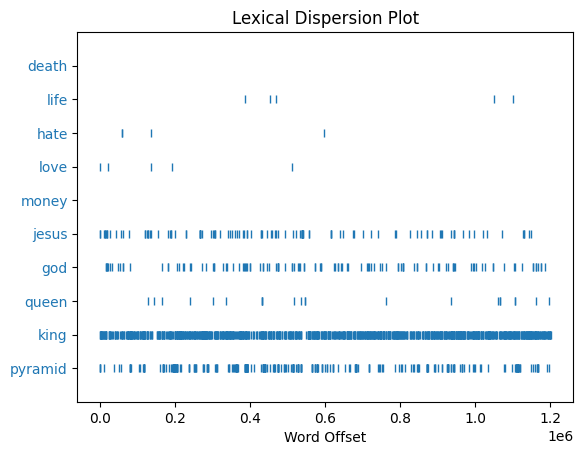

In [11]:
# Try out the `concordance` method, using the rapper Wikipedia text and a word of your own choosing.
# 1.1
print("1.1 ## Method {} with argument {} ##".format("concordance", "pyramid"))
rappers_words.concordance("pyramid")
print(80*"#")
# 1.2
print("1.2 ## Method {} with argument {} ##".format("similar", "pyramid"))
rappers_words.similar("pyramid")
print(80*"#")
# 1.2
print("1.2 ## Method {} with argument {} ##".format("common_contexts", "pyramid"))
rappers_words.common_contexts(["pyramid","king"], 5)
print(80*"#")
# 1.3
rappers_words.dispersion_plot(["pyramid","king","queen","god","jesus","money","love","hate","life","death"])
# 1.4
print("1.4 ## Method {} ##".format("collocations"))
rappers_words.collocations()
print(80*"#")
# 1.5
print("1.5 ## Find 5 words which start with letter {} ##".format("h"))
print(sorted([w for w in set(rappers_words) if w.startswith("h")])[:5])
print("1.5 ## Find 5  words which start with letter {} ##".format("g"))
print(sorted([w for w in set(rappers_words) if w.startswith("g")])[:5])
print(80*"#")
# 1.6
print("1.6 ## Find 5 words which end with letter {} ##".format("h"))
word = "Snoop"
index = rappers_words.index("Snoop")
sentence = rappers_words[index-10:index+10]
print("Sentence for word {} in inderx {}:\n {}".format(word, index, ' '.join(sentence)))
print(80*"#")
# 1.7
print("1.7 ## Find 5 longest uppercase words {} ##".format("h"))
print(sorted([w for w in set(rappers_words) if w.isupper()], key=len)[-5:])
print(80*"#")

> *Exercise 2*: Basic stats
>
> * How many tokens are there in the rapper Wikipedia text? How many distinct tokens are there?
> * Explain in your own words what aspect of language _lexical diversity_ describes. 
>     1. Compute the lexical diversity of the rapper Wikipedia text;
>     2. Compute the lexical diversity related to West (coast) and East (coast). Comment on your results.
> * Create frequency distributions for the rapper Wikipedia text, including the cumulative frequency plot for the 75 most common tokens. 
> * Find all the four-letter tokens in the rapper Wikipedia text. With the help of a frequency distribution (FreqDist), show these tokens in decreasing order of frequency.
> * What does the following code do? `sum(len(w) for w in rapperWiki)` Can you use it to work out the average token length of the rapper Wikipedia text?
> * Define a function:
>     1. called `vocab_size(text)` that has a single parameter for the `text`, and which returns the vocabulary size of the text. Apply it to the rapper Wikipedia text;
>     2. `percent(word, text)` that calculates how often a given `word` occurs in a `text`, and expresses the result as a percentage. Apply it to the rapper Wikipedia Text to compute the percentage for *Dre*.

Helpers

In [12]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

def percentage(count, total): 
    return 100 * count / total

In [13]:
def vocab_size(text):
    return len(set(text))

def percent(word, text):
    return 100 * text.count(word) / len(text)

## 2.1 ##
Number of words in the corpus: 1202195
## 2.2 ##
Lexical diversity of corpus: 0.0355
Lexical diversity (percentage) of West coast: 0.0539
Lexical diversity (percentage) of East coast: 0.0205
## 2.3 ##
Commulative frequency distribution of 75 most common words in the corpus


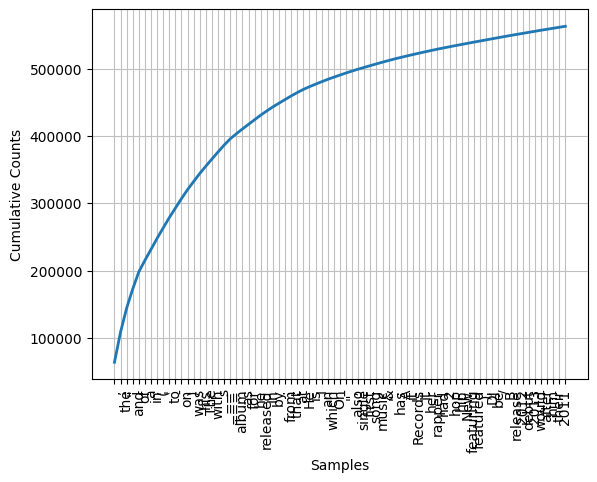

## 2.4 ##


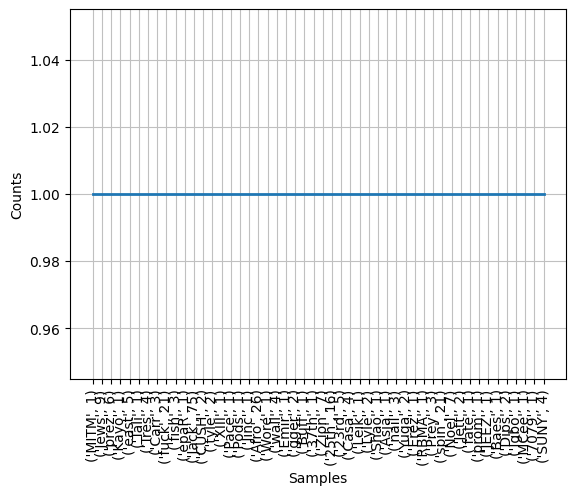

## 2.5 ##
Average word length: 3.8775
## 2.6 ##
Whole vocabulary size: 42701
The percentage of word 'Dre' is 0.057


In [14]:
# 2.1
print("## 2.1 ##")
print("Number of words in the corpus: {}".format(len(rappers_words)))
# 2.2
print("## 2.2 ##")
print("Lexical diversity of corpus: {}".format(round(lexical_diversity(rappers_words),4)))
print("Lexical diversity (percentage) of West coast: {}".format(round(percentage(rappers_words.count("West"), len(rappers_words)),4)))
print("Lexical diversity (percentage) of East coast: {}".format(round(percentage(rappers_words.count("East"), len(rappers_words)),4)))
# 2.3
print("## 2.3 ##")
print("Commulative frequency distribution of 75 most common words in the corpus")
fdist = nltk.FreqDist(rappers_words)
fdist.plot(75, cumulative=True)
# 2.4
print("## 2.4 ##")
four_letter_words_freq = [(w,fdist[w]) for w in set(rappers_words) if len(w) == 4]

fdist_four = nltk.FreqDist(four_letter_words_freq)
fdist_four.plot(50, cumulative=False)

print("## 2.5 ##")
sum_of_lens = sum(len(w) for w in rappers_words)
print("Average word length: {}".format(round(sum_of_lens/len(rappers_words),4)))
print("## 2.6 ##")
print("Whole vocabulary size: {}".format(vocab_size(rappers_words)))
word = "Dre"
print("The percentage of word '{}' is {}".format(word, round(percent(word, rappers_words),4)))





# Part 3: Working with NLTK and other types of text

So far, we've worked with text from the rapper Wikipedia. But that's not the only source of text in the universe. In fact, it's far from it. Chapter 2 in NLPP is all about getting access to nicely curated texts that you can find built into NLTK.
> 
> Reading: NLPP Chapter 2, Sec. 1 - 4.
>

> *Exercises*: NLPP Chapter 2\. (other stuff that might be due in an assignment)
> 
> * Solve exercise 4, 8, 11, 15, 16, 17, 18 in NLPP, section 2.8\. As always, I recommend you write up your solutions nicely in a `notebook`.
> * Work through exercise 2.8.23 on Zipf's law. [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law) connects to a property of the Barabasi-Albert networks. Which one? Take a look at [this article](https://www.hpl.hp.com/research/idl/papers/ranking/adamicglottometrics.pdf) and write a paragraph or two describing other important instances of power-laws found on the internet.
>

Ex 4. Read in the texts of the State of the Union addresses, using the state_union corpus reader. Count occurrences of men, women, and people in each document. What has happened to the usage of these words over time?  
Solution:

In [15]:
from nltk.corpus import state_union
# get all files from state_union
file_list = state_union.fileids()
# get all words from all files
state_union_words = nltk.Text(state_union.words(file_list))
# occurencies of men women and people
occurencies = []
for file in file_list[1:]:
    file_words = state_union.words(file)
    men_c = file_words.count("men")
    women_c = file_words.count("women")
    people_c = file_words.count("people")

    occurencies.append((file, men_c, women_c, people_c))

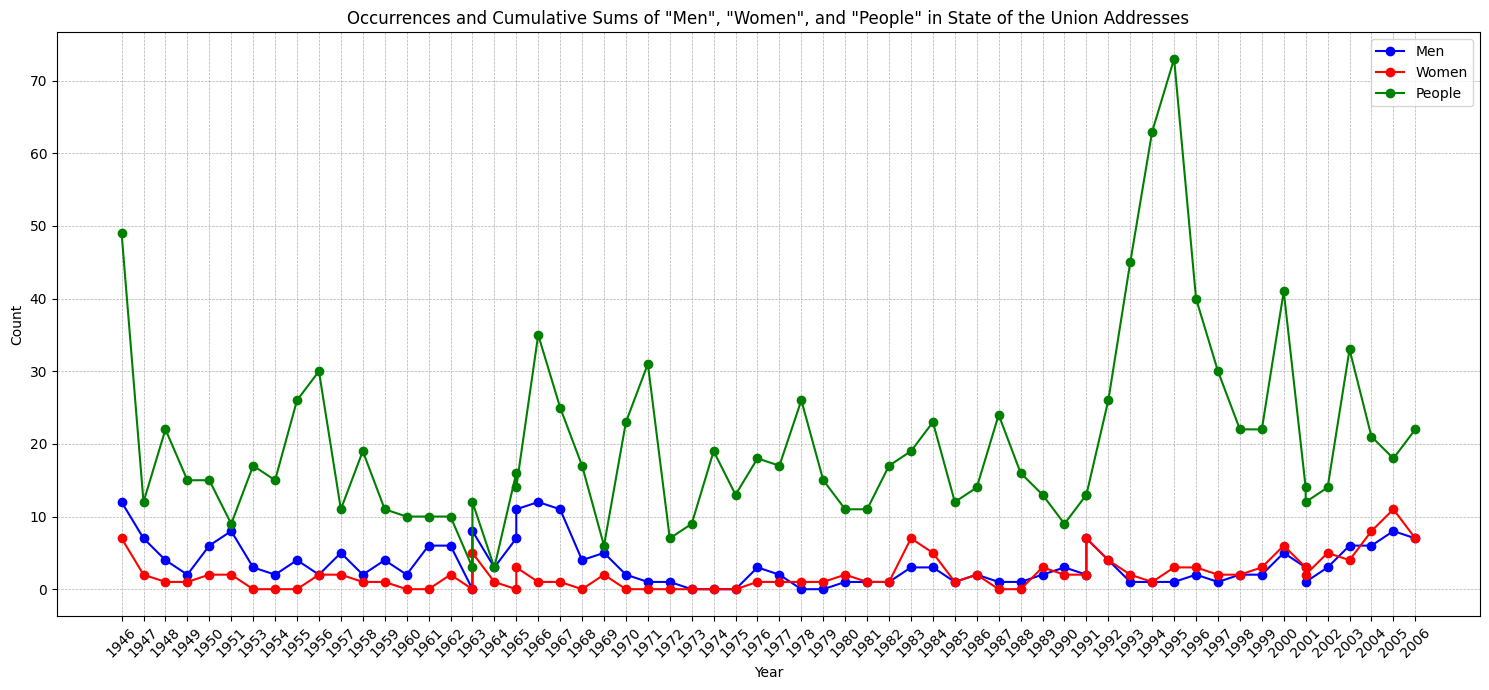

In [16]:
# Extracting data
years = [item[0][:4] for item in occurencies]  # Extracting the year from the filename
men_counts = [item[1] for item in occurencies]
women_counts = [item[2] for item in occurencies]
people_counts = [item[3] for item in occurencies]
men_cumulative = np.cumsum(men_counts)
women_cumulative = np.cumsum(women_counts)
people_cumulative = np.cumsum(people_counts)

# Plotting
plt.figure(figsize=(15, 7))

# Plot raw counts
plt.plot(years, men_counts, label='Men', marker='o', linestyle='-', color='blue')
plt.plot(years, women_counts, label='Women', marker='o', linestyle='-', color='red')
plt.plot(years, people_counts, label='People', marker='o', linestyle='-', color='green')

# # Plot cumulative counts
# plt.plot(years, men_cumulative, label='Men Cumulative', marker='', linestyle='-', color='blue' , alpha=0.5)
# plt.plot(years, women_cumulative, label='Women Cumulative', marker='', linestyle='-', color='red' , alpha=0.5)
# plt.plot(years, people_cumulative, label='People Cumulative', marker='', linestyle='-', color='green', alpha=0.5)

plt.legend()
plt.title('Occurrences and Cumulative Sums of "Men", "Women", and "People" in State of the Union Addresses')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Ex 8. Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females (cf. 4.4).  
Solution:

In [17]:
from nltk.corpus import names
# get all files from state_union
file_list = names.fileids()
# get all words from all files
names_words = nltk.Text(names.words(file_list))
female_names =  nltk.Text(names.words(file_list[0]))
male_names =  nltk.Text(names.words(file_list[1]))

print("All names: {}".format(len(names_words)))
print("Female names count {}".format(len(female_names)))
print("Male names count {}".format(len(male_names)))

All names: 7944
Female names count 5001
Male names count 2943


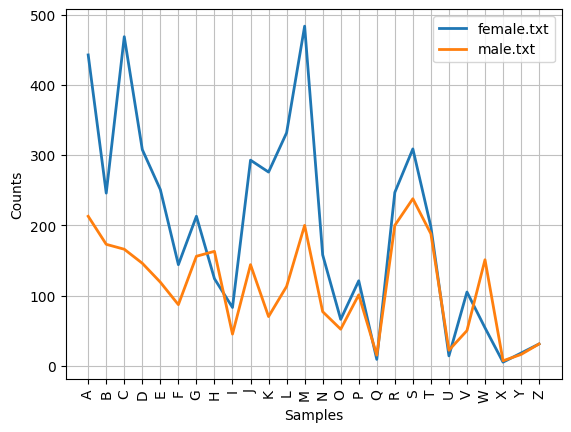

<Axes: xlabel='Samples', ylabel='Counts'>

In [18]:
cfd  = nltk.ConditionalFreqDist(
    (fileid, name[0])
    for fileid in names.fileids()
    for name in names.words(fileid))
cfd.plot()

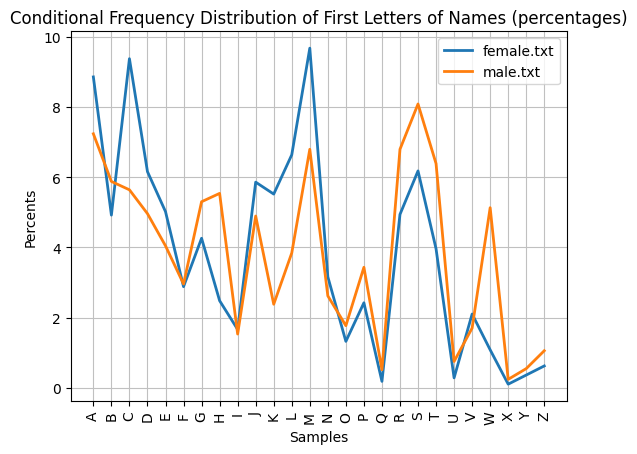

<Axes: title={'center': 'Conditional Frequency Distribution of First Letters of Names (percentages)'}, xlabel='Samples', ylabel='Percents'>

In [19]:
cfd.plot(percents=True, title="Conditional Frequency Distribution of First Letters of Names (percentages)")

Ex 11. Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?  
Solution:

In [20]:
from nltk.corpus import brown

news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print(m + ':', fdist[m], end=' ')

print()
humor_text = brown.words(categories='humor')
fdist = nltk.FreqDist(w.lower() for w in humor_text)
words_2 = ['can', 'could', 'may', 'might', 'must', 'will']
for w in words_2:
    print(w + ':', fdist[w], end=' ')

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 
can: 17 could: 33 may: 8 might: 8 must: 9 will: 13 

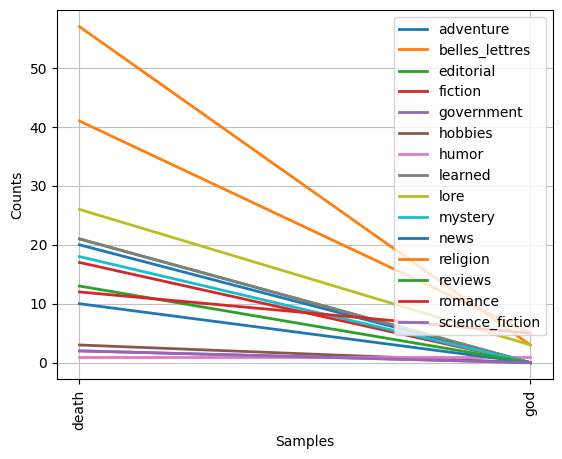

<Axes: xlabel='Samples', ylabel='Counts'>

In [21]:
categories = brown.categories()

cfd  = nltk.ConditionalFreqDist(
    (category, word)
    for category in categories
    for word in brown.words(categories=category))
cfd.plot(conditions=categories, samples=["death","god"])

Ex 15. Write a program to find all words that occur at least three times in the Brown Corpus.  
Solution:

In [22]:
file_list = brown.fileids()
brown_words = nltk.Text(brown.words(file_list))
fdist = nltk.FreqDist([w.lower() for w in brown_words])
words_with_more_than_three_occ = [w for w in fdist if fdist[w] >= 3]
print("Words with more than three occurencies: {}".format(len(words_with_more_than_three_occ)))

Words with more than three occurencies: 20615


Ex 16. Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in 1.1. Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?  
Solution:

In [23]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

Categories: ['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


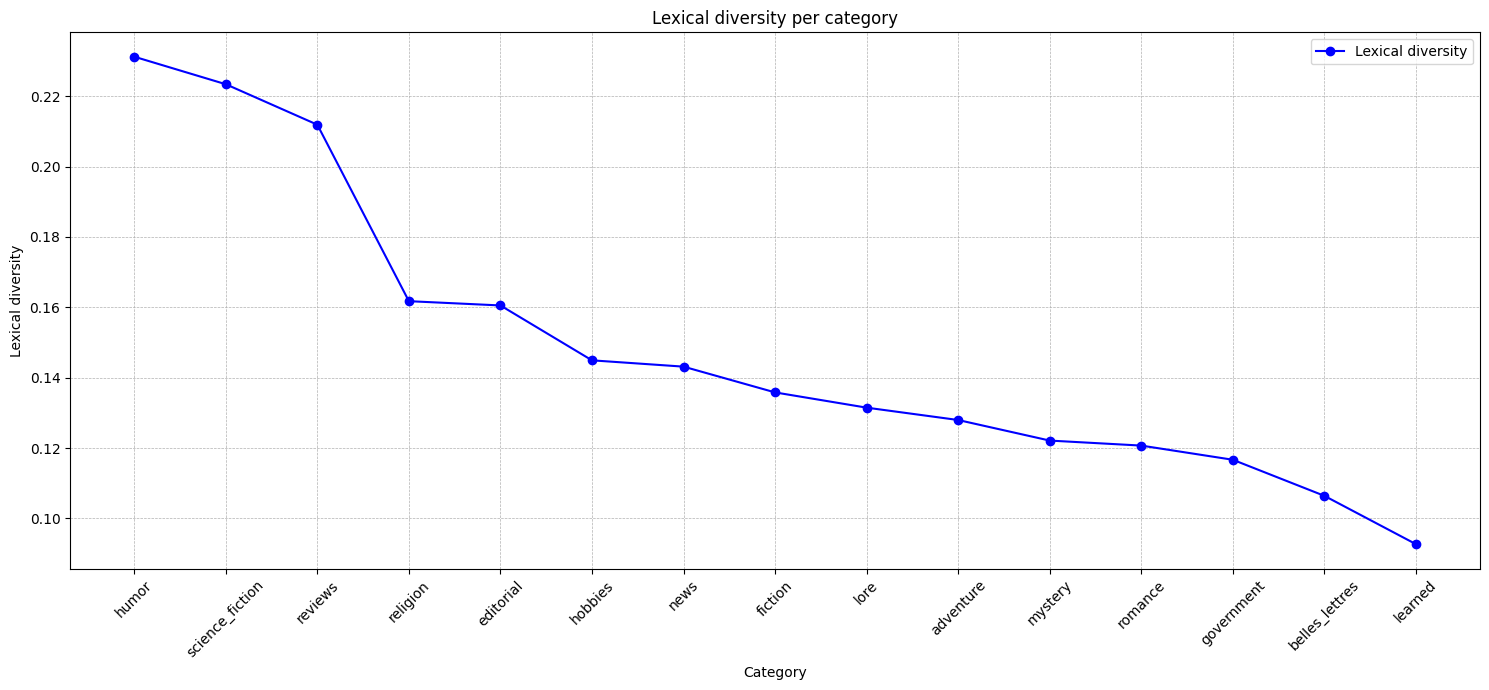

In [24]:
categories = brown.categories()
print("Categories: {}".format(categories))
lexical_diversity_per_category = [(category, lexical_diversity(brown.words(categories=category))) for category in categories]
lexical_diversity_per_category.sort(key=lambda x: x[1], reverse=True)

# Plotting
plt.figure(figsize=(15, 7))
# Plot raw counts
plt.plot([item[0] for item in lexical_diversity_per_category], [item[1] for item in lexical_diversity_per_category], label='Lexical diversity', marker='o', linestyle='-', color='blue')
plt.legend()
plt.title('Lexical diversity per category')
plt.xlabel('Category')
plt.ylabel('Lexical diversity')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Ex 17. Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.  
Solution:

In [25]:
def top_non_stopwords(text, n=50):
    # Ensure the stopwords list and the text are in the same case (e.g., lowercase)
    stopword_list = set(nltk.corpus.stopwords.words('english'))
    words = [word.lower() for word in text if word.isalpha()]  # Removing numbers and punctuation
    
    # Filtering out stopwords and computing frequency distribution
    non_stopwords = [word for word in words if word not in stopword_list]
    freq_dist = nltk.FreqDist(non_stopwords)
    
    return freq_dist.most_common(n)

top_non_stopwords(brown_words)



[('one', 3292),
 ('would', 2714),
 ('said', 1961),
 ('new', 1635),
 ('could', 1601),
 ('time', 1598),
 ('two', 1412),
 ('may', 1402),
 ('first', 1361),
 ('like', 1292),
 ('man', 1207),
 ('even', 1170),
 ('made', 1125),
 ('also', 1069),
 ('many', 1030),
 ('must', 1013),
 ('af', 996),
 ('back', 966),
 ('years', 950),
 ('much', 937),
 ('way', 908),
 ('well', 897),
 ('people', 847),
 ('little', 831),
 ('state', 807),
 ('good', 806),
 ('make', 794),
 ('world', 787),
 ('still', 782),
 ('see', 772),
 ('men', 763),
 ('work', 762),
 ('long', 752),
 ('get', 749),
 ('life', 715),
 ('never', 697),
 ('day', 687),
 ('another', 684),
 ('know', 683),
 ('last', 676),
 ('us', 675),
 ('might', 672),
 ('great', 665),
 ('old', 661),
 ('year', 658),
 ('come', 630),
 ('since', 628),
 ('go', 626),
 ('came', 622),
 ('right', 613)]

Ex 18. Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.  
Solution:

In [26]:
def get_most_freq_bigrams(text):

    bigrams = nltk.bigrams(text)
    stopwords = nltk.corpus.stopwords.words('english')
    bigrams = [bigram for bigram in bigrams if bigram[0].isalpha() and bigram[1].isalpha()]
    bigrams  = [bigram for bigram in bigrams if bigram[0].lower() not in stopwords and bigram[1].lower() not in stopwords]

    fdist = nltk.FreqDist(bigrams)
    return fdist.most_common(50)

get_most_freq_bigrams(brown_words)



[(('United', 'States'), 392),
 (('New', 'York'), 296),
 (('per', 'cent'), 146),
 (('years', 'ago'), 136),
 (('Rhode', 'Island'), 90),
 (('could', 'see'), 87),
 (('last', 'year'), 68),
 (('first', 'time'), 67),
 (('White', 'House'), 65),
 (('even', 'though'), 63),
 (('World', 'War'), 60),
 (('two', 'years'), 58),
 (('fiscal', 'year'), 57),
 (('last', 'night'), 56),
 (('high', 'school'), 54),
 (('Peace', 'Corps'), 52),
 (('old', 'man'), 52),
 (('United', 'Nations'), 49),
 (('New', 'England'), 49),
 (('young', 'man'), 47),
 (('Los', 'Angeles'), 47),
 (('one', 'thing'), 47),
 (('last', 'week'), 43),
 (('great', 'deal'), 43),
 (('General', 'Motors'), 41),
 (('President', 'Kennedy'), 40),
 (('New', 'Orleans'), 40),
 (('one', 'another'), 40),
 (('would', 'like'), 39),
 (('long', 'time'), 39),
 (('San', 'Francisco'), 39),
 (('would', 'make'), 37),
 (('one', 'day'), 37),
 (('would', 'seem'), 37),
 (('would', 'never'), 37),
 (('one', 'side'), 36),
 (('many', 'years'), 36),
 (('one', 'hand'), 36)

> * Work through exercise 2.8.23 on Zipf's law. [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law) connects to a property of the Barabasi-Albert networks. Which one? Take a look at [this article](https://www.hpl.hp.com/research/idl/papers/ranking/adamicglottometrics.pdf) and write a paragraph or two describing other important instances of power-laws found on the internet.  

★ Zipf's Law: Let f(w) be the frequency of a word w in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. f × r = k, for some constant k). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.
- Write a function to process a large text and plot word frequency against word rank using pylab.plot. Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale). What is going on at the extreme ends of the plotted line?
- Generate random text, e.g., using random.choice("abcdefg "), taking care to include the space character. You will need to import random first. Use the string concatenation operator to accumulate characters into a (very) long string. Then tokenize this string, and generate the Zipf plot as before, and compare the two plots. What do you make of Zipf's Law in the light of this?  
Solution:

In [27]:
import pylab
from nltk.corpus import brown

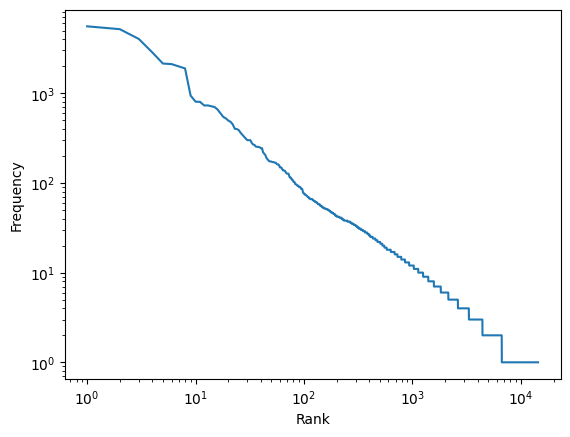

In [28]:
# A
words = brown.words(categories='news')
fdist = nltk.FreqDist(words)
sorted_freq = sorted(list(fdist.items()), key=lambda x: x[1], reverse=True)
rank = [i for i in range(1, len(sorted_freq)+1)]
freq = [item[1] for item in sorted_freq]

pylab.plot(rank, freq)
pylab.xlabel('Rank')
pylab.ylabel('Frequency')
pylab.xscale('log')
pylab.yscale('log')
pylab.show()



In [29]:
# B 
import random

chars = []
for i in range(1000000):
    chars.append(random.choice("abcdefg "))

fake_words_concat = "".join(chars)
fake_words = fake_words_concat.split()


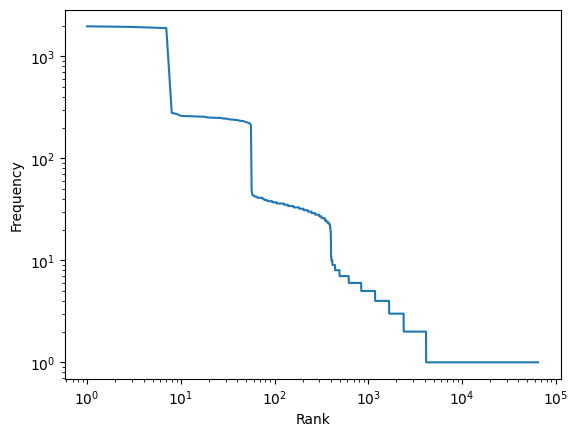

In [30]:
fdist = nltk.FreqDist(fake_words)
sorted_freq = sorted(list(fdist.items()), key=lambda x: x[1], reverse=True)
rank = [i for i in range(1, len(sorted_freq)+1)]
freq = [item[1] for item in sorted_freq]

pylab.plot(rank, freq)
pylab.xlabel('Rank')
pylab.ylabel('Frequency')
pylab.xscale('log')
pylab.yscale('log')
pylab.show()